## Лабораторная работа 6
### Линейная регрессия в sklearn
### Выполнил: 6131-010402D, Макаров Андрей Романович

## Описание данных:
### Этот набор данных был создан, чтобы перечислить всех операторов, за которых можно играть в мобильной игре Arknights, и проанализировать данные, чтобы найти интересные факты.
## Содержание:
### Этот набор данных содержит 235 различных операторов с более чем 60 строками статистики каждого оператора. Большинство столбцов представляют собой характеристики (HP, ATK, DEF, RES, REDEPLOY, DP_COST, BLOCK, INTERVAL) на каждом уровне классификации (BASE, ELITE 1, ELITE 2, MAX).


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from pandas import get_dummies


In [99]:
df = pd.read_csv('/home/anma/Рабочий стол/Files/study/Vika/datasets/data_2lab.csv', sep = ',')

In [100]:
df.info

<bound method DataFrame.info of                  name       class        branch           faction   stars  \
0            Castle-3       Guard   Dreadnought     Rhodes Island  1-star   
1    "Justice Knight"      Sniper      Marksman  Pinus Sylvestris  1-star   
2            Lancet-2       Medic         Medic     Rhodes Island  1-star   
3             THRM-EX  Specialist      Executor     Rhodes Island  1-star   
4                 12F      Caster        Splash     Rhodes Island  2-star   
..                ...         ...           ...               ...     ...   
230             Surtr       Guard  Arts Fighter     Rhodes Island  6-star   
231           Suzuran   Supporter  Decel Binder          Siracusa  6-star   
232            Thorns       Guard          Lord            Iberia  6-star   
233                 W      Sniper  Artilleryman             Babel  6-star   
234             Weedy  Specialist  Push Stroker     Rhodes Island  6-star   

    position                               

In [101]:
df.head(4)

,name,class,branch,faction,stars,position,tags,trait,availability,icon,...,images,experience,place_of_birth,date_of_birth,race,infection_status,strength,tactical_acumen,combat_skill,arts_adaptability
0,Castle-3,Guard,Dreadnought,Rhodes Island,1-star,Melee,"['Support', 'Robot']",Blocks 1 enemy and ignores the Deployment Limi...,Recruitment,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Base': 'https://static.wikia.nocookie.net/mr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Justice Knight""",Sniper,Marksman,Pinus Sylvestris,1-star,Ranged,"['Support', 'Robot']",Attacks aerial enemies first and ignores the D...,Recruitment,https://static.wikia.nocookie.net/mrfz/images/...,...,"{'""Justice Knight""': 'https://static.wikia.noc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lancet-2,Medic,Medic,Rhodes Island,1-star,Ranged,"['Healing', 'Robot']",Restores the HP of allies and ignores the Depl...,Recruitment; TR-10,https://static.wikia.nocookie.net/mrfz/images/...,...,{'Default': 'https://static.wikia.nocookie.net...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,THRM-EX,Specialist,Executor,Rhodes Island,1-star,Melee,"['Nuker', 'Robot']",Does not attack and ignores the Deployment Lim...,Recruitment; 7-2,https://static.wikia.nocookie.net/mrfz/images/...,...,{'THRM-EX': 'https://static.wikia.nocookie.net...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Уберем наны из датафрейма
df = df.dropna(axis='columns')

In [103]:
df.columns

Index(['name', 'class', 'branch', 'faction', 'stars', 'position', 'tags',
       'trait', 'availability', 'icon', 'description', 'phrase', 'file_no.',
       'height', 'mobility', 'endurance', 'base_hp', 'elite_1_hp',
       'elite_2_hp', 'max_hp', 'base_atk', 'elite_1_atk', 'elite_2_atk',
       'max_atk', 'base_def', 'elite_1_def', 'elite_2_def', 'max_def',
       'base_res', 'elite_1_res', 'elite_2_res', 'max_res', 'base_redeploy',
       'elite_1_redeploy', 'elite_2_redeploy', 'max_redeploy', 'base_dp_cost',
       'elite_1_dp_cost', 'elite_2_dp_cost', 'max_dp_cost', 'base_block',
       'elite_1_block', 'elite_2_block', 'max_block', 'base_interval',
       'elite_1_interval', 'elite_2_interval', 'max_interval', 'images'],
      dtype='object')

### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [104]:
df_full = df[['name', 'class', 'branch','base_atk','base_hp','base_def','elite_1_atk','elite_1_def','base_block','elite_1_block']].copy()

In [105]:
df = df_full.drop('name', axis=1)
df = df.drop('class', axis=1)
df = df.drop('branch',axis=1)

In [106]:
df_last = df_full.copy()

In [107]:
df_last

,name,class,branch,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block
0,Castle-3,Guard,Dreadnought,247,928,63,353,90,1,1
1,"""Justice Knight""",Sniper,Marksman,137,396,32,172,41,1,1
2,Lancet-2,Medic,Medic,42,261,16,70,27,1,1
3,THRM-EX,Specialist,Executor,208,1154,354,260,443,0,0
4,12F,Caster,Splash,302,1461,31,432,50,1,1
...,...,...,...,...,...,...,...,...,...,...
230,Surtr,Guard,Arts Fighter,288,1330,186,418,267,1,1
231,Suzuran,Supporter,Decel Binder,220,673,57,324,83,1,1
232,Thorns,Guard,Lord,296,1096,191,442,263,2,2
233,W,Sniper,Artilleryman,397,821,68,568,89,1,1


### 2. Визуализировать heatmap-матрицу кореллированности признаков.

<AxesSubplot:>

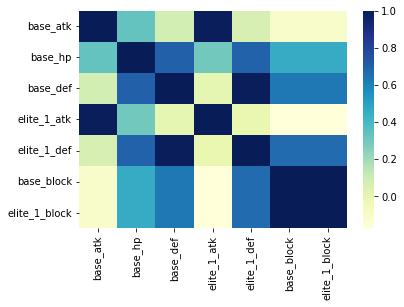

In [10]:
sns.heatmap(df.corr(), cmap= 'YlGnBu')

### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком
Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.

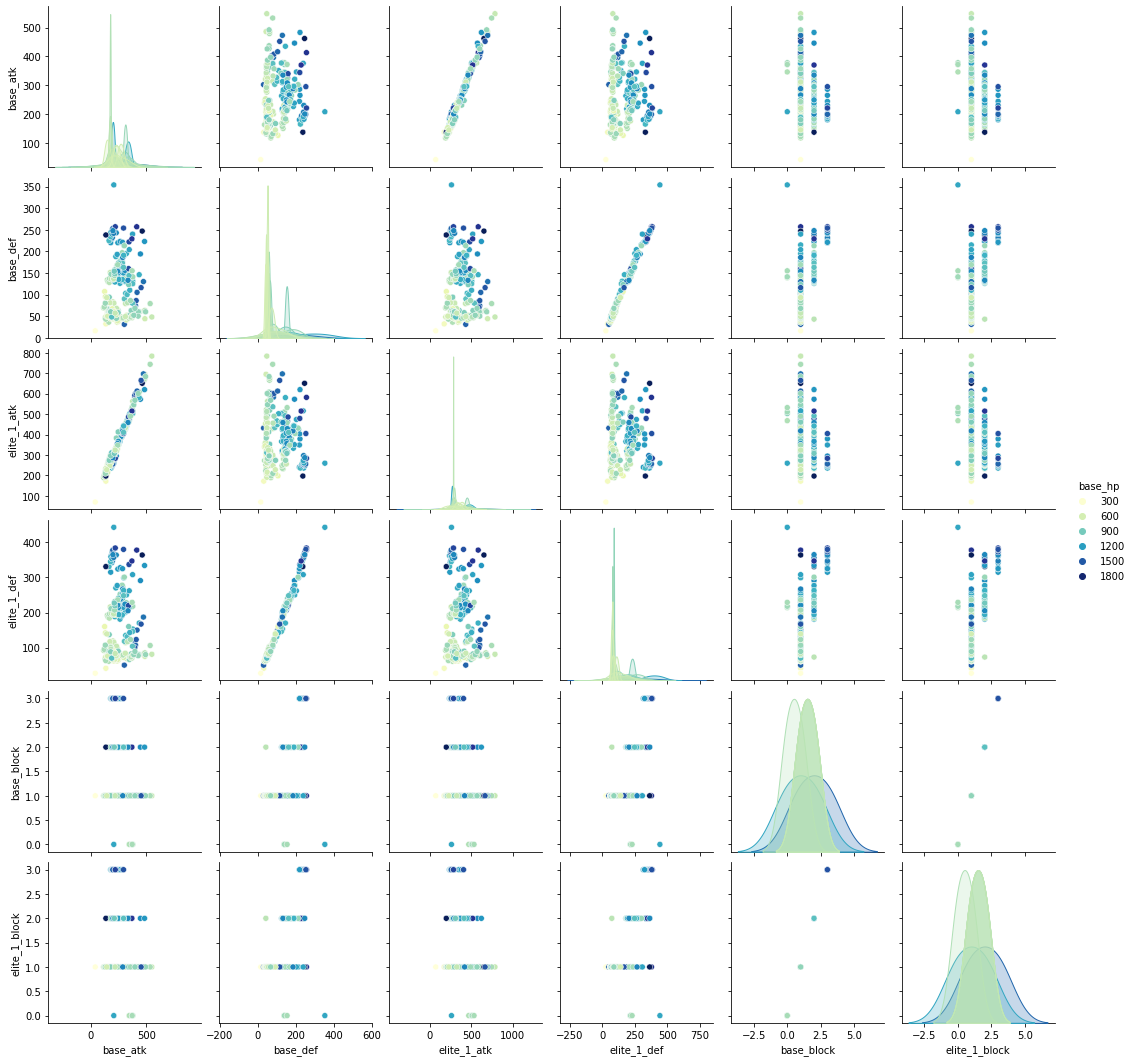

In [11]:
sns.pairplot(df, hue = "base_hp", palette = "YlGnBu")

### 4. Разделить набор данных на обучающую и тестовую выборки

In [12]:
X = df.drop('base_hp', axis = 1)
Y = df.base_hp

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.5, random_state = 50)

In [14]:
X_train

,base_atk,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block
226,297,189,444,259,2,2
193,375,80,536,104,1,1
213,295,254,405,380,3,3
21,229,148,333,212,1,1
3,208,354,260,443,0,0
...,...,...,...,...,...,...
33,145,47,205,72,1,1
109,416,105,613,150,1,1
139,281,45,396,77,1,1
224,180,60,296,88,1,1


In [15]:
Y_train

226    1075
193     985
213    1539
21      688
3      1154
       ... 
33      589
109    1443
139     658
224     854
176     812
Name: base_hp, Length: 117, dtype: int64

### 5. Линейная регрессия
#### 5.1 Обучить модель линейной регрессии (LinearRegression)

In [24]:
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

In [25]:
def metrics(pred_model, Y_data):
    mae = mean_absolute_error(Y_data, pred_model)
    mse = mean_squared_error(Y_data, pred_model)
    r2 = r2_score(Y_data, pred_model)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('R2: ', r2)

#### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [26]:
print('метрики на обущающем наборе')
metrics(pred_train, Y_train)
print("")
print('Метрики на тестовом наборе')
metrics(pred_test, Y_test)

метрики на обущающем наборе
MAE:  146.268606313763
MSE:  37687.16607417067
R2:  0.6268830411904285

Метрики на тестовом наборе
MAE:  149.81694066523028
MSE:  35475.75912795555
R2:  0.5641067045538721


In [27]:
def intercept_coef(model):
    importance = model_regress.coef_
    print('coef: ', importance)
    intercept = model_regress.intercept_
    print('intercept: ', intercept)

In [28]:
intercept_coef(model_regress)

coef:  [-4.2606048   0.47107253  3.92520735  1.83162403 38.37995708 38.37995708]
intercept:  72.58059740686713


### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках
#### Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

In [29]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')

   importance      attribute
0   -4.260605       base_atk
1    0.471073       base_def
3    1.831624    elite_1_def
2    3.925207    elite_1_atk
4   38.379957     base_block
5   38.379957  elite_1_block


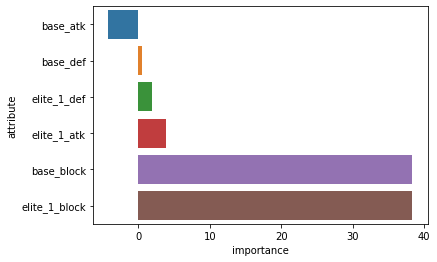

In [30]:
barh_plot(model_regress, X_train)

### 6. Модель Lasso
#### 6.1 Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [31]:
model_lasso = Lasso()

# подбираем параметры
parametrs = {"alpha": np.arange(0.1, 100, 0.1)}
model_lasso = GridSearchCV(model_lasso, parametrs, refit = True)
model_lasso.fit(X_train, Y_train)

print(model_lasso.best_params_)

/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.708e+03, tolerance: 8.751e+02
  model = cd_fast.enet_coordinate_descent(
/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+03, tolerance: 8.751e+02
  model = cd_fast.enet_coordinate_descent(


{'alpha': 3.6}


#### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [32]:
# обучение модели
model_lasso = Lasso(alpha = 3.6)
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

In [33]:
print('метрики на обущающем наборе')
metrics(pred_lasso_train, Y_train)

метрики на обущающем наборе
MAE:  146.78390963297082
MSE:  37748.30064520167
R2:  0.6262777862031916


In [117]:
print('Метрики на тестовом наборе')
metrics(pred_lasso_test, Y_test)

Метрики на тестовом наборе
MAE:  150.03167090920252
MSE:  35329.695915771146
R2:  0.5659013941240902


In [34]:
intercept_coef(model_lasso)

coef:  [-4.2606048   0.47107253  3.92520735  1.83162403 38.37995708 38.37995708]
intercept:  72.58059740686713


   importance      attribute
0   -4.127717       base_atk
5    0.000000  elite_1_block
1    0.063329       base_def
3    2.175098    elite_1_def
2    3.816266    elite_1_atk
4   60.023366     base_block


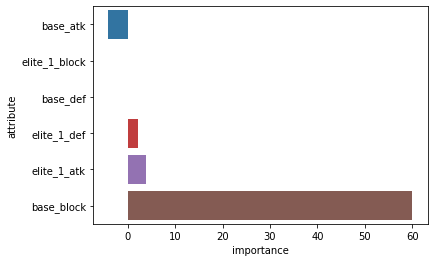

In [35]:
barh_plot(model_lasso, X_train)

### 7. Модель Ridge
#### 7.1 Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [36]:
model_ridge = Ridge()

# подбираем параметры
parametrs = {"alpha": np.arange(0.1, 100, 0.1)}
model_ridge = GridSearchCV(model_ridge, parametrs, refit = True)
model_ridge.fit(X_train, Y_train)

print(model_ridge.best_params_)

{'alpha': 19.400000000000002}


In [37]:
# обучение модели
model_ridge = Ridge(alpha = 19.4)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

#### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [38]:
print('Метрики на обущающем наборе')
metrics(pred_ridge_train, Y_train)

Метрики на обущающем наборе
MAE:  146.91246142899496
MSE:  37784.83144645085
R2:  0.6259161176861654


In [39]:
print('Метрики на тестовом наборе')
metrics(pred_ridge_test, Y_test)

Метрики на тестовом наборе
MAE:  150.17016300202116
MSE:  35316.57200101013
R2:  0.5660626486425262


#### 7.3 Для лучшей модели вывести model.coef и model.intercept

In [40]:
intercept_coef(model_ridge)

coef:  [-4.2606048   0.47107253  3.92520735  1.83162403 38.37995708 38.37995708]
intercept:  72.58059740686713


#### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance      attribute
0   -4.149495       base_atk
1   -0.030535       base_def
3    2.260328    elite_1_def
2    3.829660    elite_1_atk
4   27.773112     base_block
5   27.773112  elite_1_block


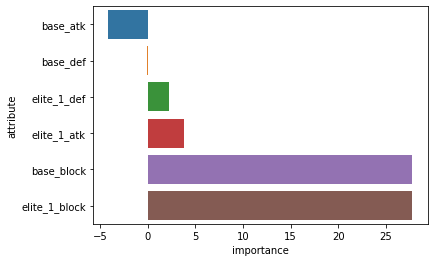

In [41]:
barh_plot(model_ridge, X_train)

### 8. Модель ElasticNet
#### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [42]:
model_elastic = ElasticNet()

# подбираем параметры
parametrs = {"alpha": np.arange(0.05, 1, 0.05), "l1_ratio": np.arange(0.05, 1, 0.05)}

model_elastic = GridSearchCV(model_elastic, parametrs, refit = True)
model_elastic.fit(X_train, Y_train)

print(model_elastic.best_params_)

/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+06, tolerance: 9.040e+02
  model = cd_fast.enet_coordinate_descent(
/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+06, tolerance: 1.046e+03
  model = cd_fast.enet_coordinate_descent(
/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.967e+03,

{'alpha': 0.25, 'l1_ratio': 0.15000000000000002}


/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.703e+04, tolerance: 1.182e+03
  model = cd_fast.enet_coordinate_descent(


In [43]:
# обучение модели
model_elastic = ElasticNet(alpha = 0.25, l1_ratio = 0.15)
model_elastic.fit(X_train, Y_train)
pred_elastic_train = model_elastic.predict(X_train)
pred_elastic_test = model_elastic.predict(X_test)

/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.703e+04, tolerance: 1.182e+03
  model = cd_fast.enet_coordinate_descent(


#### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [44]:
print('Метрики на обущающем наборе')
metrics(pred_elastic_train, Y_train)
print("")
print('Метрики на тестовом наборе')
metrics(pred_elastic_test, Y_test)

Метрики на обущающем наборе
MAE:  147.06939643305742
MSE:  37826.44058739427
R2:  0.6255041717176908

Метрики на тестовом наборе
MAE:  150.28916761452084
MSE:  35300.97206763918
R2:  0.5662543261860927


#### 7.3 Для лучшей модели вывести model.coef и model.intercept


In [45]:
intercept_coef(model_ridge)

coef:  [-4.2606048   0.47107253  3.92520735  1.83162403 38.37995708 38.37995708]
intercept:  72.58059740686713


#### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках


   importance      attribute
0   -4.149495       base_atk
1   -0.030535       base_def
3    2.260328    elite_1_def
2    3.829660    elite_1_atk
4   27.773112     base_block
5   27.773112  elite_1_block


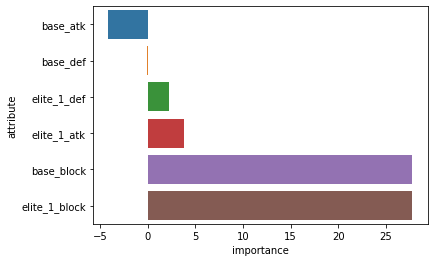

In [46]:
barh_plot(model_ridge, X_train)

### 9. Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Лучшая модель LinearRegression 

MAE:  146.268606313763 

MSE:  37687.16607417067

R2:  0.6268830411904285

In [108]:
df_last

,name,class,branch,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block
0,Castle-3,Guard,Dreadnought,247,928,63,353,90,1,1
1,"""Justice Knight""",Sniper,Marksman,137,396,32,172,41,1,1
2,Lancet-2,Medic,Medic,42,261,16,70,27,1,1
3,THRM-EX,Specialist,Executor,208,1154,354,260,443,0,0
4,12F,Caster,Splash,302,1461,31,432,50,1,1
...,...,...,...,...,...,...,...,...,...,...
230,Surtr,Guard,Arts Fighter,288,1330,186,418,267,1,1
231,Suzuran,Supporter,Decel Binder,220,673,57,324,83,1,1
232,Thorns,Guard,Lord,296,1096,191,442,263,2,2
233,W,Sniper,Artilleryman,397,821,68,568,89,1,1


In [109]:
df = get_dummies(df_last, drop_first = True)

In [113]:
df.columns

Index(['base_atk', 'base_hp', 'base_def', 'elite_1_atk', 'elite_1_def',
       'base_block', 'elite_1_block', 'class_Defender', 'class_Guard',
       'class_Medic', 'class_Sniper', 'class_Specialist', 'class_Supporter',
       'class_Vanguard', 'branch_Ambusher', 'branch_Artificer',
       'branch_Artilleryman', 'branch_Arts Fighter', 'branch_Arts Protector',
       'branch_Bard', 'branch_Besieger', 'branch_Blast', 'branch_Centurion',
       'branch_Chain', 'branch_Charger', 'branch_Core', 'branch_Deadeye',
       'branch_Decel Binder', 'branch_Dollkeeper', 'branch_Dreadnought',
       'branch_Duelist', 'branch_Executor', 'branch_Fighter', 'branch_Flinger',
       'branch_Fortress', 'branch_Geek', 'branch_Guardian',
       'branch_Heavyshooter', 'branch_Hexer', 'branch_Hookmaster',
       'branch_Instructor', 'branch_Juggernaut', 'branch_Liberator',
       'branch_Lord', 'branch_Marksman', 'branch_Mech-Accord', 'branch_Medic',
       'branch_Merchant', 'branch_Multi-target', 'branch_Mu

In [111]:
df_last

,name,class,branch,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block
0,Castle-3,Guard,Dreadnought,247,928,63,353,90,1,1
1,"""Justice Knight""",Sniper,Marksman,137,396,32,172,41,1,1
2,Lancet-2,Medic,Medic,42,261,16,70,27,1,1
3,THRM-EX,Specialist,Executor,208,1154,354,260,443,0,0
4,12F,Caster,Splash,302,1461,31,432,50,1,1
...,...,...,...,...,...,...,...,...,...,...
230,Surtr,Guard,Arts Fighter,288,1330,186,418,267,1,1
231,Suzuran,Supporter,Decel Binder,220,673,57,324,83,1,1
232,Thorns,Guard,Lord,296,1096,191,442,263,2,2
233,W,Sniper,Artilleryman,397,821,68,568,89,1,1


In [110]:
df

,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block,name_12F,name_Aak,name_Absinthe,...,branch_Reaper,branch_Splash,branch_Spreadshooter,branch_Standard Bearer,branch_Summoner,branch_Swordmaster,branch_Tactician,branch_Therapist,branch_Trapmaster,branch_Wandering
0,247,928,63,353,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,137,396,32,172,41,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,261,16,70,27,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,208,1154,354,260,443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,302,1461,31,432,50,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,288,1330,186,418,267,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,220,673,57,324,83,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,296,1096,191,442,263,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,397,821,68,568,89,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Убирамем названия автомобилей
for i in np.unique(df_last['name']):
    name = 'name_'+ i
    if df.get(name, None) is not None:
        df.drop(columns = name, inplace = True)
    else:
        print(f'Name is not exist: {name}')

df.head()

Name is not exist: name_"Justice Knight"


,base_atk,base_hp,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block,class_Defender,class_Guard,class_Medic,...,branch_Reaper,branch_Splash,branch_Spreadshooter,branch_Standard Bearer,branch_Summoner,branch_Swordmaster,branch_Tactician,branch_Therapist,branch_Trapmaster,branch_Wandering
0,247,928,63,353,90,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,137,396,32,172,41,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,261,16,70,27,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,208,1154,354,260,443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,302,1461,31,432,50,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [114]:
X = df.drop('base_hp', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.5, random_state = 50)

In [115]:
model_best = Lasso(alpha = 0.01)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.492e+05, tolerance: 1.182e+03
  model = cd_fast.enet_coordinate_descent(


#### 11. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы
#### Значение метрики R2 стало больше. Значение метрик MAE и MSE незначительно уменьшилось.

In [116]:
print('Метрики на тестовом наборе')
metrics(pred_best_test, Y_test)


"""
Метрики на тестовом наборе
MAE:  150.03167090920252
MSE:  35329.695915771146
R2:  0.5659013941240902
"""

Метрики на тестовом наборе
MAE:  91.24540642268572
MSE:  16208.304604762956
R2:  0.8008473537583203


### 12. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель.
#### Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

In [118]:
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)
X_new_test = scaler.fit_transform(X_test)

In [119]:
model_scaler = Lasso(alpha = 0.01)
model_scaler.fit(X_new_train, Y_train)
pred_scaler_test = model_scaler.predict(X_new_test)

print('Метрики на тестовом наборе')
metrics(pred_scaler_test, Y_test)

Метрики на тестовом наборе
MAE:  100.2552300435421
MSE:  17578.890417277686
R2:  0.7840068637675657


/home/anma/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.285e+05, tolerance: 1.182e+03
  model = cd_fast.enet_coordinate_descent(


### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

In [120]:
X_scaler = pd.DataFrame(X_new_train, columns = X_train.columns)
X_scaler.head()

,base_atk,base_def,elite_1_atk,elite_1_def,base_block,elite_1_block,class_Defender,class_Guard,class_Medic,class_Sniper,...,branch_Reaper,branch_Splash,branch_Spreadshooter,branch_Standard Bearer,branch_Summoner,branch_Swordmaster,branch_Tactician,branch_Therapist,branch_Trapmaster,branch_Wandering
0,0.462960,0.993033,0.615280,0.871832,1.003476,1.003476,-0.383482,2.202272,-0.398015,-0.398015,...,0.0,-0.211289,0.0,-0.131876,-0.092848,-0.092848,-0.131876,-0.162221,-0.131876,-0.092848
1,1.291548,-0.501615,1.345637,-0.629086,-0.521286,-0.521286,-0.383482,-0.454077,-0.398015,2.512469,...,0.0,-0.211289,0.0,-0.131876,-0.092848,-0.092848,-0.131876,-0.162221,-0.131876,-0.092848
2,0.441714,1.884337,0.305672,2.043517,2.528237,2.528237,2.607681,-0.454077,-0.398015,-0.398015,...,0.0,-0.211289,0.0,-0.131876,-0.092848,-0.092848,-0.131876,-0.162221,-0.131876,-0.092848
3,-0.259399,0.430826,-0.265911,0.416715,-0.521286,-0.521286,-0.383482,-0.454077,-0.398015,-0.398015,...,0.0,-0.211289,0.0,-0.131876,-0.092848,-0.092848,-0.131876,-0.162221,-0.131876,-0.092848
4,-0.482481,3.255574,-0.845433,2.653567,-2.046048,-2.046048,-0.383482,-0.454077,-0.398015,-0.398015,...,0.0,-0.211289,0.0,-0.131876,-0.092848,-0.092848,-0.131876,-0.162221,-0.131876,-0.092848


    importance          attribute
0  -566.697402           base_atk
42  -55.651392        branch_Lord
39  -51.071583  branch_Instructor
35  -28.916116    branch_Guardian
49  -28.855130      branch_Mystic
..         ...                ...
41   61.048787   branch_Liberator
7    62.078459        class_Guard
6    92.236956     class_Defender
1   173.606517           base_def
2   647.823738        elite_1_atk

[64 rows x 2 columns]


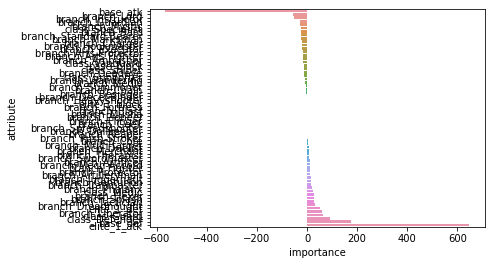

In [129]:
barh_plot(model_scaler, X_scaler)
